In [18]:
import pandas as pd
data = pd.read_csv('/Users/yena/Desktop/SCH/척척석사/연구 진행 및 분석 코드/약물전체추가/1.5/FINAL_약물전체추가(1:1.5).csv')
data = data.drop(columns=['등록번호'])
data.head()

,MFS,total_cci,키,몸무게,성별,나이,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,...,Cluster_O,Cluster_P,Cluster_Q,Cluster_R,Cluster_S,Cluster_T,Cluster_U,ADL_전문,ADL_위험,욕창_기동력
0,50.0,0.0,185.3,110.3,0,28.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,1.8,185.3,101.8,0,35.9,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,0.0,171.0,101.0,0,31.0,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,1.0,179.0,98.4,0,44.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70.0,0.0,169.1,97.0,0,44.9,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
x = data.drop(columns=['낙상유무'])
y = data['낙상유무']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=10)
model.fit(x_train, y_train)

# predict probabilities
probs = model.predict_proba(x_test)

#keep probabilities for the positive outcome only
probs = probs[:,1]


# predict
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# y 절편
print(model.intercept_)

[0.02268273]


In [22]:
# 독립변수 각 기울기 값
print(model.coef_)

[[-2.81477336e-04 -2.11589055e-02 -3.01796556e-03  1.90020703e-02
   3.43389206e-01 -3.28151950e-02 -5.80886695e-01  3.39291264e-01
  -4.73564778e-01  1.30239381e+00 -1.14381939e-01  5.09529262e-02
  -1.52162577e+00 -1.53079713e-01  4.71121918e-01  3.62806094e-01
   1.00115616e+00  1.89274578e+00  2.00712963e-01  1.61657629e+00
   1.83205245e+00  1.82973455e+00  1.75798591e+00  4.64736139e-01
   3.56582109e-01  1.65198708e+00  9.64103422e-01  4.82398009e-01
   3.64974550e-01  7.37906469e-02  7.61194174e-02  8.68930415e-01
   2.47437601e+00  6.77423712e-01  4.67309196e-01  1.19007483e+00
   2.65386449e-01  1.02864287e+00]]


In [23]:
import numpy as np

weight = model.coef_
weight

weight2 = []

for i in range(0,len(x_train.columns)):
    weight2.append(weight[0][i])

#weight이 값을 시리즈에 저장
coeff = pd.Series(data= weight2 , index= x_train.columns)
sorted_values =  coeff.sort_values(ascending=False)    #coeff 를 내림차순으로 정렬해주세요
sorted_values

Cluster_S           2.474376
Cluster_D           1.892746
Cluster_G           1.832052
Cluster_H           1.829735
Cluster_I           1.757986
Cluster_L           1.651987
Cluster_F           1.616576
ADL_식사섭취            1.302394
ADL_전문              1.190075
욕창_기동력              1.028643
Cluster_C           1.001156
Cluster_M           0.964103
Cluster_R           0.868930
Cluster_T           0.677424
Cluster_N           0.482398
Cluster_A           0.471122
Cluster_U           0.467309
Cluster_J           0.464736
Cluster_O           0.364975
Cluster_B           0.362806
Cluster_K           0.356582
성별                  0.343389
ADL_체위변경            0.339291
ADL_위험              0.265386
Cluster_E           0.200713
Cluster_Q           0.076119
Cluster_P           0.073791
통증강도                0.050953
몸무게                 0.019002
MFS                -0.000281
키                  -0.003018
total_cci          -0.021159
나이                 -0.032815
호흡 간호_비침습적 산소 투여   -0.114382
욕창_영양         

In [24]:
# 학습데이터, 테스트 데이터 결정계수
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9289827255278311
0.9419642857142857


In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, roc_auc_score, f1_score, auc, roc_curve, precision_recall_curve

# predict class values
lr_pred = model.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, probs)
lr_f1, lr_auc = f1_score(y_test, lr_pred), auc(lr_recall, lr_precision)

In [26]:
# summarize scores
print('Logistic: f1 = %.3f auc = %.3f' % (lr_f1, lr_auc))

Logistic: f1 = 0.949 auc = 0.990


In [27]:
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test,lr_pred)
print('Logistic Regression 정답률 : %.4f' % lr_accuracy)

Logistic Regression 정답률 : 0.9420


In [28]:
print('train r2 score : ', r2_score(y_train, y_train_pred))
print('test r2 score : ', r2_score(y_test, y_test_pred))

train r2 score :  0.7008442223532698
test r2 score :  0.7630208333333334


/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


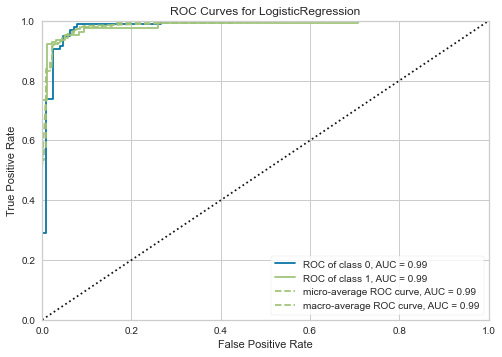

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [29]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, classes=[0,1])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [30]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print('tn, fp, fn, tp = ', tn, fp, fn, tp)


recall = tp/(tp + fn) # 민감도 또는 재현율
specificity = tn/(tn + fp) # 특이도
precision = tp/(tp+fp) # 정밀도, 양성예측도
minus = tn/(fn+tn)  # 음성예측도

print('양성예측도 = ', precision)
print('음성예측도 = ' ,minus)
print('민감도 = ', recall)
print('특이도 = ' ,specificity)

tn, fp, fn, tp =  91 5 8 120
양성예측도 =  0.96
음성예측도 =  0.9191919191919192
민감도 =  0.9375
특이도 =  0.9479166666666666


In [31]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10)
display_score(cross_val)

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Score :  [0.94339623 0.88461538 0.90384615 0.90384615 0.92307692 0.92307692
 0.86538462 0.96153846 0.96153846 0.90384615]
Mean :  0.9174165457184325
StandardDeviation :  0.02994697816928097


/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [32]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='f1', cv=10)
display_score(cross_val)

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Score :  [0.95238095 0.9        0.92063492 0.92063492 0.9375     0.93939394
 0.89552239 0.96969697 0.96774194 0.92307692]
Mean :  0.9326582949362198
StandardDeviation :  0.024263316027583883


/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [33]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=10)
display_score(cross_val)

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Score :  [0.98809524 0.9109063  0.959375   0.975      0.9875     0.984375
 0.95625    1.         1.         0.9703125 ]
Mean :  0.9731814036098312
StandardDeviation :  0.025215533653660013


/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [34]:
import statsmodels.api as sm

import pandas as pd
data = pd.read_csv('/Users/yena/Desktop/SCH/척척석사/연구 진행 및 분석 코드/약물전체추가/1.5/FINAL_약물전체추가(1:1.5).csv')
data = data.drop(columns=['등록번호'])
data.head()

x = data.drop(columns=['낙상유무'])
y = data['낙상유무']

x_sm=sm.add_constant(x)

logit_model=sm.Logit(y,x_sm)
result=logit_model.fit(method='ncg')

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.189170
         Iterations: 14
         Function evaluations: 21
         Gradient evaluations: 21
         Hessian evaluations: 14
                           Logit Regression Results                           
Dep. Variable:                   낙상유무   No. Observations:                  745
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                           38
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.7189
Time:                        00:48:32   Log-Likelihood:                -140.93
converged:                       True   LL-Null:                       -501.39
Covariance Type:            nonrobust   LLR p-value:                4.926e-127
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [76]:

a = ['const', 'MFS', 'total_cci', '키', '몸무게', '성별', '나이', 'ADL_배뇨, 배변', 'ADL_체위변경',
        'ADL_침상 밖으로 이동', 'ADL_식사섭취', '호흡 간호_비침습적 산소 투여', '통증강도', '욕창_행동',
        '욕창_영양',  'Cluster_A', 'Cluster_B', 'Cluster_C', 'Cluster_D',
        'Cluster_E', 'Cluster_F', 'Cluster_G', 'Cluster_H', 'Cluster_I',
        'Cluster_J', 'Cluster_K', 'Cluster_L', 'Cluster_M', 'Cluster_N',
        'Cluster_O', 'Cluster_P', 'Cluster_Q', 'Cluster_R', 'Cluster_S',
        'Cluster_T', 'Cluster_U', 'ADL_전문', 'ADL_위험', '욕창_기동력']
len(a)

39

In [81]:
b = [0.0293,-0.0076 ,0.0071,0.0031,0.0062,0.3422 , -0.0281 ,-0.4731,  0.3049, 
     -0.4316, 0.9601, -0.0855,0.0911, -1.3341 , -0.3362,  0.2953,  0.2628,  0.7459,
     1.4830,  0.1491 ,   1.3006,  1.3390 ,  1.4706 ,    1.4584 ,0.3818 , 0.3086 , 
     1.4901, 0.6829,  0.4019 , 0.4696  ,    0.0780 ,    0.0868 ,  0.7810 ,  1.8991 ,
     0.4874 , 0.5154 , 0.9654,  0.2474,0.7075 ]
c = pd.DataFrame(b,a).rename(columns={0:'beta'})
c
len(b)

39

In [82]:
beta_exp = []
for i in c['beta']:
    beta_exp.append(np.exp(i))
    
c['exp'] = beta_exp

In [83]:
c['exp'].mean()

1.9158721777756995

In [84]:
c['exp_div'] = round(c['exp']/1.9158721777756995,4)


c

,beta,exp,exp_div
const,0.0293,1.029733,0.5375
MFS,-0.0076,0.992429,0.5180
total_cci,0.0071,1.007125,0.5257
키,0.0031,1.003105,0.5236
몸무게,0.0062,1.006219,0.5252
성별,0.3422,1.408042,0.7349
나이,-0.0281,0.972291,0.5075
"ADL_배뇨, 배변",-0.4731,0.623068,0.3252
ADL_체위변경,0.3049,1.356489,0.7080
ADL_침상 밖으로 이동,-0.4316,0.649469,0.3390


In [86]:
a = c.drop(columns=['beta','exp'])
a

,exp_div
const,0.5375
MFS,0.5180
total_cci,0.5257
키,0.5236
몸무게,0.5252
성별,0.7349
나이,0.5075
"ADL_배뇨, 배변",0.3252
ADL_체위변경,0.7080
ADL_침상 밖으로 이동,0.3390


In [89]:
a.sort_values(by='exp_div', ascending=False)

,exp_div
Cluster_S,3.4866
Cluster_L,2.3162
Cluster_D,2.2998
Cluster_H,2.2715
Cluster_I,2.2439
Cluster_G,1.9914
Cluster_F,1.9164
ADL_전문,1.3706
ADL_식사섭취,1.3633
Cluster_R,1.1398


In [50]:
stand = pd.DataFrame(sorted_values).rename(columns={0:'beta'})
stand

,beta
Cluster_S,2.474376
Cluster_D,1.892746
Cluster_G,1.832052
Cluster_H,1.829735
Cluster_I,1.757986
Cluster_L,1.651987
Cluster_F,1.616576
ADL_식사섭취,1.302394
ADL_전문,1.190075
욕창_기동력,1.028643


In [51]:

beta_exp = []
for i in stand['beta']:
    beta_exp.append(np.exp(i))
    
stand['exp'] = beta_exp


In [52]:
stand['exp'].mean()

2.4705450291427042

In [54]:
stand['exp_div'] = stand['exp']/2.4705450291427042
stand

,beta,exp,exp_div
Cluster_S,2.474376,11.874295,4.806346
Cluster_D,1.892746,6.637569,2.686682
Cluster_G,1.832052,6.246695,2.528468
Cluster_H,1.829735,6.232232,2.522614
Cluster_I,1.757986,5.800742,2.347961
Cluster_L,1.651987,5.217337,2.111816
Cluster_F,1.616576,5.035820,2.038344
ADL_식사섭취,1.302394,3.678091,1.488777
ADL_전문,1.190075,3.287327,1.330608
욕창_기동력,1.028643,2.797267,1.132247
